# Data Analysis - Data Augmentation Research
***

### Import Packages

In [1]:
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
import numpy as np
import pickle, os

### Useful Functions

In [2]:
def read_json_in_dict_format(json_file, dir_name):
    '''
    open a json file in a pythonic dictionary
    
    Args:
        json_file (str) --> json file name
    Returns:
        data (dict) --> pythonic dictionary
    '''

    try:
        with open(dir_name + json_file, 'rb') as file_open:
            json_to_dict = pickle.load(file_open)
        return json_to_dict
    except:
        return dict()

In [3]:
def apply_labels(json_data):
    '''
    applies the labels to certain data values
    
    Args:
        json_data (dict) --> json file converted to dictionary with unlabeled data
    Returns:
        json_data (dict) --> json file converted to dictionary with labeled data
    '''

    labels = ['Positivo', 'Neutro', 'Negativo']
    user_data = json_data['user_data']
    for i in range(len(user_data)):
        for j in range(len(user_data[0])):
            try:
                json_data['user_data'][i][j] = labels[user_data[i][j] - 1]
            except:
                pass
    
    return json_data

In [4]:
def organize_json_files(json_data):
    '''
    organize keywords from json file converted to dictionary
    
    Args:
        json_data (dict) --> json file converted to dictionary with encoded keywords
    Returns:
        json_data (dict) --> json file converted to dictionary with captionable keywords
    '''

    user_info = json_data['user_info']
    user_data = json_data['user_data']
    organized_json = {'Nome': [user_info['name']], 'Universidade': [user_info['university']], 
                      'Email': [user_info['email']], 'Curso/Formação': [user_info['skill']],
                      'Familiaridade com a Radiologia': [user_info['radiology_familiarity']],
                      'Familiaridade com PDI': [user_info['pdi_familiarity']],
                      'Ruído Sal e Pimenta': [user_data[0][0]], 'Ruído Gaussiano': [user_data[0][1]],
                      'Rotação': [user_data[1][0]], 'Translação': [user_data[1][1]],
                      'Correção Gamma < 0': [user_data[2][0]], 'Correção Gamma > 1':[ user_data[2][2]],
                      'Transformações Logarítmicas': [user_data[3][0]], 
                      'Equalização de Histograma': [user_data[3][1]],
                      'Aguçamento': user_data[3][2], 'Filtro da Média': [user_data[4][0]],
                      'Filtro da Mediana': [user_data[4][1]], 'Filtro Gaussiano': [user_data[4][2]]}
    
    return organized_json

In [5]:
def organize_dataframe(json_data):
    '''
    save the converted json file to dictionary in a pandas dataframe
    
    Args:
        json_data (dict) --> json file converted to dictionary
    Returns:
        dataframe (pandas) --> converted pandas dataframe
    '''

    return pd.DataFrame(data = json_data, columns = list(json_data.keys()))

In [6]:
def count_cases(label, dataframe):
    '''
    counts positive, neutral and negative cases in a dataframe

    Args:
        label (str) --> column label in dataframe
        dataframe (pandas) --> reference pandas dataframe
    
    Returns:
        values_count (list) --> count of positive, neutral and negative cases for a given label
    '''

    value1 = len(dataframe[dataframe[label] == 'Positivo'])
    value2 = len(dataframe[dataframe[label] == 'Neutro'])
    value3 = len(dataframe[dataframe[label] == 'Negativo'])

    return [value1, value2, value3]

In [7]:
def autolabel(rects):
    '''
    plots the values on top of each bar graph
    
    Args:
        rects (matplotlib object) --> object with plotted graph properties
    '''

    for rect in rects:
        height = rect.get_height()
        if height != 0.0:
            ax.annotate('{}'.format(height), xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext = (0, 3), textcoords = 'offset points',
                        ha = 'center', va = 'bottom', size = 17)
    
    return

### Extracting useful information from JSON data

In [12]:
json_files = np.array(os.listdir('../json_data/'))
map_func = partial(read_json_in_dict_format, dir_name = '../json_data/')
json_files = list(map(map_func, json_files))
json_files = list(map(apply_labels, json_files))
json_files = list(map(organize_json_files, json_files))
dataframe = pd.concat((list(map(organize_dataframe, json_files))))
dataframe.to_csv(path_or_buf = '../data_table.csv')
map_func = partial(count_cases, dataframe = dataframe)
number_cases = list(map(map_func, list(json_files[0].keys())[6:]))
number_cases = (np.array(number_cases) / len(json_files)) * 100

### Building Charts from Extracted Data

(None, None, None)

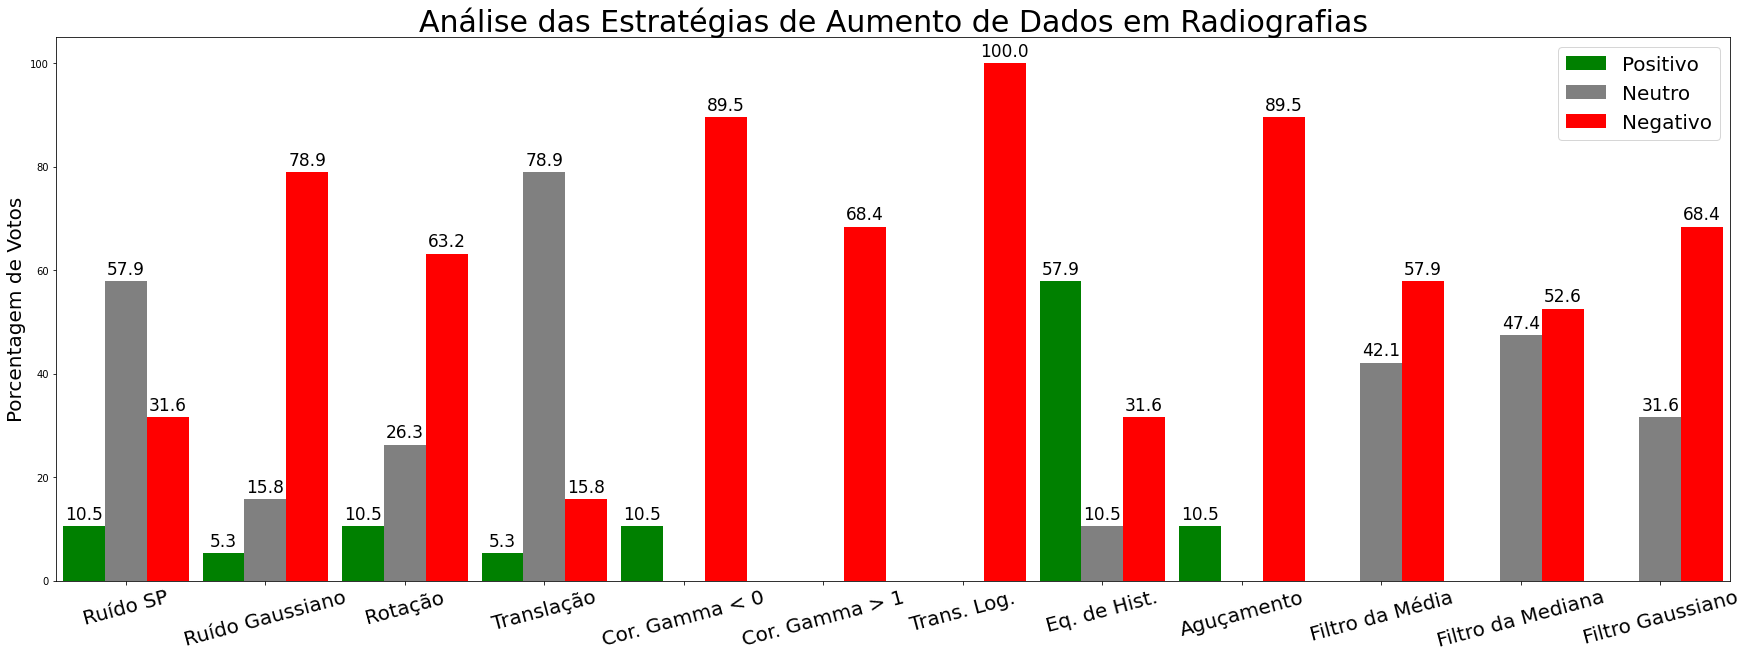

In [13]:
labels = ['Ruído SP', 'Ruído Gaussiano', 'Rotação', 'Translação', 'Cor. Gamma < 0',
          'Cor. Gamma > 1', 'Trans. Log.', 'Eq. de Hist.', 'Aguçamento',
          'Filtro da Média', 'Filtro da Mediana', 'Filtro Gaussiano']
positive = np.round(number_cases[:,0], 1)
neutral = np.round(number_cases[:,1], 1)
negative = np.round(number_cases[:,2], 1)

x, width = np.arange(len(labels)), 0.3

fig, ax = plt.subplots(figsize = (30, 10))
rects1 = ax.bar(x - width, positive, width, label = 'Positivo', color = 'green')
rects2 = ax.bar(x, neutral, width, label = 'Neutro', color = 'grey')
rects3 = ax.bar(x + width, negative, width, label = 'Negativo', color = 'red')

ax.set_ylabel('Porcentagem de Votos', size = 20)
ax.set_title('Análise das Estratégias de Aumento de Dados em Radiografias', size = 30)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 15, size = 20)
ax.legend(fontsize = 20)
ax.set_xlim([-0.5,11.5])

autolabel(rects1), autolabel(rects2), autolabel(rects3)